# 7.1.6 MLPClassifier

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
    
import warnings
warnings.filterwarnings("ignore")

En clasificación binaria, la función logística es usada la activación de la neurona de salida. Valores superiores a 0.5 indican pertenencia a la clase positiva, mientras que valores inferiores a 0.5 indican pertenencia a la clase negativa.

Para clasificación con más de dos clases, se tiene una neurona de salida por cada clase, y el cálculo de la activación se hace mediante la función softmax:

$$ softmax(z)_i = \frac{\exp(z_i)}{ \sum_{i}^{} \exp(z_i)} $$

donde $z_i$ representa el $i$-ésimo elemento que corresponde a la clase $i$. El resultado es la probabilidad de pertenencia del patrón $x$ a la clase $i$. El patrón se asigna a la clase con probabilidad más alta.

En este caso, se minimiza el promedio de la función de entropia cruzada, que para el caso binario es: 

$$ \text{Loss}(\hat{y}, y, W) = \frac{1}{n} \sum_{i=1}^{n} \left(y_i log \hat{y_i} + (1 - y_i) log(1-\hat{y_i})\right)$$

$ \frac{\alpha}{2n} ||W||_2^2 $

In [3]:
X, y = make_moons(n_samples=100, shuffle=False)

In [4]:
#
# NOTA: Usa los mismos parámetros que MLPRegressor
#
mlpClassifier = MLPClassifier(
    # --------------------------------------------------------------------------
    # The ith element represents the number of neurons in the ith hidden layer.
    hidden_layer_sizes=(6,),
    # --------------------------------------------------------------------------
    # Activation function for the hidden layer.
    # * ‘identity’
    # * 'logistic'
    # * 'tanh'
    # * 'relu'
    # activation='relu',
    activation="logistic",
    # --------------------------------------------------------------------------
    # The solver for weight optimization.
    # * 'lbfgs'
    # * 'sgd'
    # * 'adam'
    solver="adam",
    # --------------------------------------------------------------------------
    # Strength of the L2 regularization term.
    alpha=0.0001,
    # --------------------------------------------------------------------------
    # Size of minibatches for stochastic optimizers. If the solver is ‘lbfgs’,
    # the classifier will not use minibatch. When set to “auto”,
    # batch_size=min(200, n_samples).
    batch_size='auto',
    # --------------------------------------------------------------------------
    # Learning rate schedule for weight updates. Only used when solver=’sgd’.
    # * ‘constant’ is a constant learning rate given by ‘learning_rate_init’.
    # * ‘invscaling’ gradually decreases the learning rate learning_rate_ at
    #   each time step ‘t’ using an inverse scaling exponent of ‘power_t’.
    #   effective_learning_rate = learning_rate_init / pow(t, power_t)
    # * ‘adaptive’ keeps the learning rate constant to ‘learning_rate_init’ as
    #   long as training loss keeps decreasing. Each time two consecutive
    #   epochs fail to decrease training loss by at least tol, or fail to
    #   increase validation score by at least tol if ‘early_stopping’ is on,
    #   the current learning rate is divided by 5.
    learning_rate='constant',
    # --------------------------------------------------------------------------
    # The initial learning rate used. It controls the step-size in updating the
    # weights. Only used when solver=’sgd’ or ‘adam’.
    # learning_rate_init=0.001,
    learning_rate_init=0.1,
    # --------------------------------------------------------------------------
    # The exponent for inverse scaling learning rate. It is used in updating
    # effective learning rate when the learning_rate is set to ‘invscaling’.
    # Only used when solver=’sgd’.
    power_t=0.5,
    # --------------------------------------------------------------------------
    # Maximum number of iterations. The solver iterates until convergence
    # (determined by ‘tol’) or this number of iterations. For stochastic solvers
    # (‘sgd’, ‘adam’), note that this determines the number of epochs (how many
    # times each data point will be used), not the number of gradient steps.
    # default: 200
    max_iter=1000,
    # --------------------------------------------------------------------------
    # Whether to shuffle samples in each iteration. Only used when solver=’sgd’
    # or ‘adam’.
    shuffle=True,
    # --------------------------------------------------------------------------
    # Determines random number generation for weights and bias initialization,
    # train-test split if early stopping is used, and batch sampling when
    # solver=’sgd’ or ‘adam’.
    random_state=None,
    # --------------------------------------------------------------------------
    # Tolerance for the optimization. When the loss or score is not improving
    # by at least tol for n_iter_no_change consecutive iterations, unless
    # learning_rate is set to ‘adaptive’, convergence is considered to be
    # reached and training stops.
    tol=1e-4,
    # --------------------------------------------------------------------------
    # When set to True, reuse the solution of the previous call to fit as
    # initialization, otherwise, just erase the previous solution.
    warm_start=False,
    # --------------------------------------------------------------------------
    # Momentum for gradient descent update. Should be between 0 and 1. Only
    # used when solver=’sgd’.
    momentum=0.9,
    # --------------------------------------------------------------------------
    # Whether to use Nesterov’s momentum. Only used when solver=’sgd’ and
    # momentum > 0.
    nesterovs_momentum=True,
    # --------------------------------------------------------------------------
    # Whether to use early stopping to terminate training when validation score
    # is not improving. If set to true, it will automatically set aside 10% of
    # training data as validation and terminate training when validation score
    # is not improving by at least tol for n_iter_no_change consecutive epochs.
    # Only effective when solver=’sgd’ or ‘adam’.
    early_stopping=False,
    # --------------------------------------------------------------------------
    # The proportion of training data to set aside as validation set for early
    # stopping. Must be between 0 and 1. Only used if early_stopping is True.
    validation_fraction=0.1,
    # --------------------------------------------------------------------------
    # Exponential decay rate for estimates of first moment vector in adam,
    # should be in [0, 1). Only used when solver=’adam’.
    beta_1=0.9,
    # --------------------------------------------------------------------------
    # Exponential decay rate for estimates of second moment vector in adam,
    # should be in [0, 1). Only used when solver=’adam’.
    beta_2=0.999,
    # --------------------------------------------------------------------------
    # Value for numerical stability in adam. Only used when solver=’adam’.
    epsilon=1e-8,
    # --------------------------------------------------------------------------
    # Maximum number of epochs to not meet tol improvement. Only effective when
    # solver=’sgd’ or ‘adam’.
    n_iter_no_change=10,
    # --------------------------------------------------------------------------
    # Only used when solver=’lbfgs’. Maximum number of function calls. The
    # solver iterates until convergence (determined by ‘tol’), number of
    # iterations reaches max_iter, or this number of function calls.
    max_fun=15000,
)

In [5]:
mlpClassifier.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(6,),
              learning_rate_init=0.1, max_iter=1000)

In [6]:
#
# Class labels for each output.
#
mlpClassifier.classes_

array([0, 1], dtype=int64)

In [7]:
#
# The current loss computed with the loss function.
#
mlpClassifier.loss_

0.27217167303798534

In [8]:
#
# The minimum loss reached by the solver throughout fitting.
#
mlpClassifier.best_loss_

0.2698365410020493

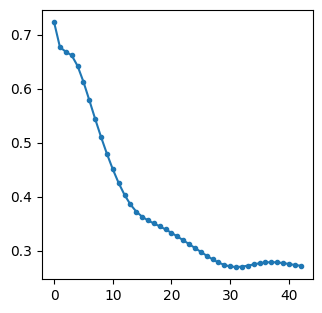

In [9]:
#
# Loss value evaluated at the end of each training step. The ith element in the
# list represents the loss at the ith iteration.
#
plt.figure(figsize=(3.5, 3.5))
plt.plot(mlpClassifier.loss_curve_, ".-")
plt.show()

In [10]:
#
# The ith element in the list represents the weight matrix corresponding to
# layer i.
#
mlpClassifier.coefs_

[array([[-0.02319617,  0.54399688,  0.55087601, -0.61645217, -0.49449007,
         -0.53818304],
        [ 3.06401934, -3.19476699, -3.30975988,  2.74334734,  2.52426712,
          3.14402021]]),
 array([[-1.27076587],
        [ 2.21871979],
        [ 2.32041795],
        [-1.55328813],
        [-1.01326571],
        [-1.77945941]])]

In [11]:
#
# The ith element in the list represents the bias vector corresponding to layer
# i + 1.
#
mlpClassifier.intercepts_

[array([-0.64958071,  0.61919181,  0.59537167, -0.19395628, -1.82163214,
        -0.2890129 ]),
 array([0.40320991])]

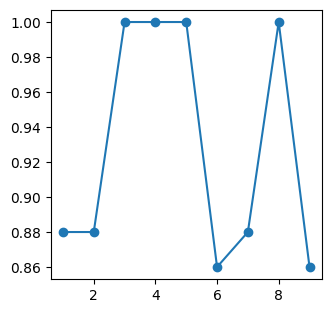

In [12]:
score = []

for h in range(1, 10):

    mlpClassifier = MLPClassifier(
        hidden_layer_sizes=(h,),
        activation="logistic",
        solver="adam",
        alpha=0.0,
        learning_rate='constant',
        learning_rate_init=0.1,
        max_iter=1000,
        random_state=1,
    )

    mlpClassifier.fit(X, y)
    score.append(mlpClassifier.score(X, y))

plt.figure(figsize=(3.5, 3.5))
plt.plot(range(1, 10), score, "-o")

In [13]:
print('ok_')

ok_
